<a href="https://colab.research.google.com/github/shresthasandeepsc/GitTutorial/blob/master/assignment_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIT744 Assignment 2: Efficient Training of Convolutional Neural Network 

<div class="alert-info">
    <p>Due: <strong>11:59pm 21 September 2020</strong>  (Monday)</p>

This is an <strong>individual</strong> assignment. It contributes <strong>45%</strong> to your final mark. Read the assignment instruction carefully.

<h2> What to submit </h2>

<p>
This assignment is to be completed individually and submitted to CloudDeakin. <strong>By the due date, you are required to submit the following files to the corresponding Assignment (Dropbox) in CloudDeakin</strong>:

<ol>
<li>	<strong>[YourID]_assignment2_solution.ipynp</strong>:  This is your Python notebook solution source file. </li>
<li>	<strong>[YourID]_assingment2_output.html</strong>: This is the output of your Python notebook solution <emph>exported</emph> in HTML format.</li>
<li>	Extra files needed to complete your assignment, if any (e.g., images used in your answers).</li>
</ol>
</p>

<p>
For example, if your student ID is: 123456, you will then need to submit the following files:
<ul>
<li> 123456_assignment2_solution.ipynp </li>
<li> 123456_assignment2_output.html</li>
</ul>
</p>

<h2> Warning </h2>

Some components of this assignment may involve heavy computation that runs for a long duration. Please start early to avoid missing the assignment due date.

<h2> Marking criteria </h2>

<p>
Your submission will be marked using the following criteria.

<ul>
<li> Showing good effort through completed tasks.</li>
<li> Applying deep learning theory to design suitable deep learning solutions for the tasks.</li>
<li> Critically evaluating and reflecting on the pros and cons of various design decisions.</li>
<li> Demonstrating creativity and resourcefulness in providing unique individual solutions.</li>
<li> Showing attention to details through a good quality assignment report.</li>
</ul>
</p>

<p>
Indicative weights of various tasks are provided, but the assignment will be marked by the overall quality per the above criteria.
</p>
</div>

## Assignment objective

This assignment is to feedback on your learning in deep learning theory and its application to  data analytics or artificial intelligence problems.  

It builds on Assignment 1 but requires a higher level of mastery of deep learning theory and programming/engineering skills. In particular, you will experience training a much deeper network on a large-scale dataset. You will encounter  practical issues that help you consolidate textbook learning. 

## Task 1 Solving Fashion-MNIST with Convolutional Neural Networks

*(weight ~18%)*

In Assignment 1, you tackled the image classification problem in Fashion-MNIST. There, you used a Densely Connected Neural Network. You should now know that is not an optimal model architecture for the problem. In Assignment 2, you will apply the best practices of deep-learning computer vision to improve the image classification performance.

### Task 1.1 Revisit Fashion-MNIST classification with DNN

*(weight ~2%)*

Review your Assignment 1 solution, and reproduce the experiment here. Try to improve the model without changing the model architecture.


In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.callbacks import LearningRateScheduler

import numpy as np
import matplotlib.pyplot as plt
import datetime

print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


In [2]:
# load fashion mnist dataset from keras dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

In [4]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [5]:
# One-hot encoding of labels
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
(train_images, valid_images) = (train_images[5000:], train_images[:5000])
(train_labels, valid_labels) = (train_labels[5000:], train_labels[:5000])

In [7]:
dataset_train = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
dataset_test = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
dataset_valid = tf.data.Dataset.from_tensor_slices((valid_images, valid_labels))

In [8]:
dataset_train = dataset_train.shuffle(10000).repeat(1500).batch(1280).prefetch(tf.data.experimental.AUTOTUNE)
dataset_test = dataset_test.batch(1280).prefetch(tf.data.experimental.AUTOTUNE)
dataset_valid = dataset_valid.batch(1280).prefetch(tf.data.experimental.AUTOTUNE)

In [10]:
steps_per_epoch = len(dataset_train)/1280

In [13]:
!rm -rf ./logs/assign-1-logs 
fit_log_dir = "logs/assign-1-logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=fit_log_dir, histogram_freq=1)

In [19]:
# Construct a Sequential model with 2 hidden layers
fmnist_model = models.Sequential([
    layers.Dropout(0.2),
    layers.Dense(units=512, input_dim=28 * 28, activation=tf.nn.relu),
    layers.Dense(units=128, input_dim=512, activation=tf.nn.relu),
    layers.Dense(units=10, input_dim=128,  activation=tf.nn.softmax)
])

# Compile the model
fmnist_model.compile(optimizer = tf.optimizers.Adam(),
                     loss = 'categorical_crossentropy', # as we have already used the one-hot encoding for the training labels
                     metrics=['accuracy'])

history = fmnist_model.fit(dataset_train, 
                           epochs=1100,
                           steps_per_epoch= steps_per_epoch,
                           validation_data = dataset_valid,
                           callbacks = [tensorboard_callback])

Epoch 1/1100
51/50 [==============================] - 0s 8ms/step - loss: 0.7267 - accuracy: 0.7507 - val_loss: 0.4688 - val_accuracy: 0.8392
Epoch 2/1100
51/50 [==============================] - 0s 5ms/step - loss: 0.4743 - accuracy: 0.8314 - val_loss: 0.4097 - val_accuracy: 0.8580
Epoch 3/1100
51/50 [==============================] - 0s 5ms/step - loss: 0.4292 - accuracy: 0.8464 - val_loss: 0.3724 - val_accuracy: 0.8716
Epoch 4/1100
51/50 [==============================] - 0s 5ms/step - loss: 0.3925 - accuracy: 0.8609 - val_loss: 0.3653 - val_accuracy: 0.8718
Epoch 5/1100
51/50 [==============================] - 0s 5ms/step - loss: 0.3801 - accuracy: 0.8626 - val_loss: 0.3465 - val_accuracy: 0.8790
Epoch 6/1100
51/50 [==============================] - 0s 5ms/step - loss: 0.3604 - accuracy: 0.8689 - val_loss: 0.3359 - val_accuracy: 0.8840
Epoch 7/1100
51/50 [==============================] - 0s 5ms/step - loss: 0.3494 - accuracy: 0.8722 - val_loss: 0.3175 - val_accuracy: 0.8884
Epoch 

In [15]:
def plot_train_loss():
  loss_train = history.history['loss']
  loss_val = history.history['val_loss']
  epochs = range(1,1101)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='Validation loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [16]:
def plot_train_accuracy():
  accuracy_train = history.history['accuracy']
  accuracy_val = history.history['val_accuracy']
  epochs = range(1,1101)
  plt.plot(epochs, accuracy_train, 'g', label='Training accuracy')
  plt.plot(epochs, accuracy_val, 'b', label='Validation accuracy')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

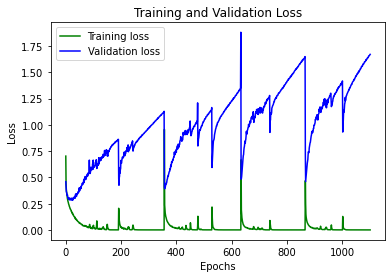

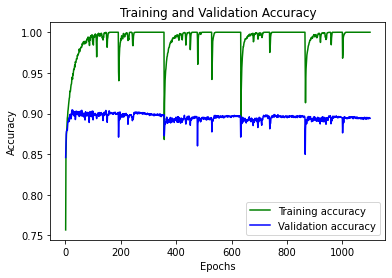

In [17]:
# Original from A_1
plot_train_loss()
plot_train_accuracy()

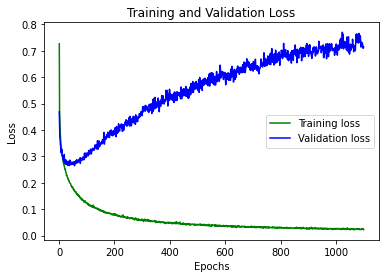

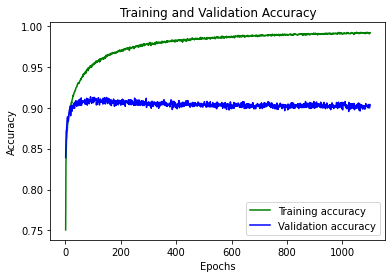

In [21]:
# adding dropout before first hidden layer
plot_train_loss()
plot_train_accuracy()

In [20]:
score = fmnist_model.evaluate(dataset_test, verbose=1)

8/8 [==============================] - 0s 3ms/step - loss: 0.7913 - accuracy: 0.8927


In [22]:
fmnist_model = models.Sequential([
    layers.Dense(units=512, input_dim=28 * 28, activation=tf.nn.relu),
    layers.Dropout(0.2),
    layers.Dense(units=128, input_dim=512, activation=tf.nn.relu),
    layers.Dense(units=10, input_dim=128,  activation=tf.nn.softmax)
])

# Compile the model
fmnist_model.compile(optimizer = tf.optimizers.Adam(),
                     loss = 'categorical_crossentropy', # as we have already used the one-hot encoding for the training labels
                     metrics=['accuracy'])

history = fmnist_model.fit(dataset_train, 
                           epochs=1100,
                           steps_per_epoch= steps_per_epoch,
                           validation_data = dataset_valid,
                           callbacks = [tensorboard_callback])

Epoch 1/1100
51/50 [==============================] - 0s 8ms/step - loss: 0.7568 - accuracy: 0.7381 - val_loss: 0.4646 - val_accuracy: 0.8338
Epoch 2/1100
51/50 [==============================] - 0s 5ms/step - loss: 0.4526 - accuracy: 0.8401 - val_loss: 0.3973 - val_accuracy: 0.8622
Epoch 3/1100
51/50 [==============================] - 0s 5ms/step - loss: 0.3952 - accuracy: 0.8585 - val_loss: 0.3652 - val_accuracy: 0.8702
Epoch 4/1100
51/50 [==============================] - 0s 5ms/step - loss: 0.3598 - accuracy: 0.8714 - val_loss: 0.3385 - val_accuracy: 0.8796
Epoch 5/1100
51/50 [==============================] - 0s 5ms/step - loss: 0.3395 - accuracy: 0.8783 - val_loss: 0.3306 - val_accuracy: 0.8826
Epoch 6/1100
51/50 [==============================] - 0s 5ms/step - loss: 0.3235 - accuracy: 0.8830 - val_loss: 0.3275 - val_accuracy: 0.8830
Epoch 7/1100
51/50 [==============================] - 0s 5ms/step - loss: 0.3080 - accuracy: 0.8866 - val_loss: 0.3180 - val_accuracy: 0.8858
Epoch 

In [23]:
score = fmnist_model.evaluate(dataset_test, verbose=1)

8/8 [==============================] - 0s 3ms/step - loss: 1.0931 - accuracy: 0.9023


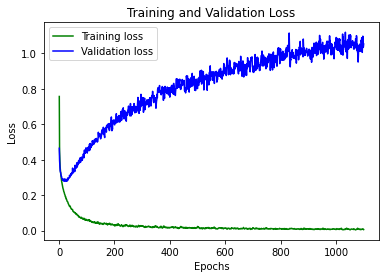

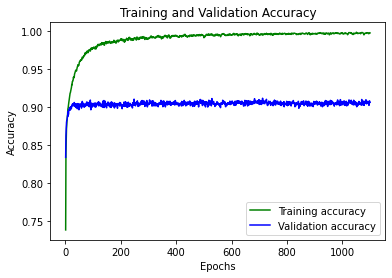

In [24]:
# adding dropout after first hidden layer
plot_train_loss()
plot_train_accuracy()

In [27]:
fmnist_model = models.Sequential([
    layers.Dense(units=512, input_dim=28 * 28, activation=tf.nn.relu),
    layers.Dropout(0.2),
    layers.Dense(units=128, input_dim=512, activation=tf.nn.relu),
    layers.Dense(units=10, input_dim=128,  activation=tf.nn.softmax)
])

# Compile the model
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-5,
    decay_steps=10000,
    decay_rate=0.9)

fmnist_model.compile(optimizer = tf.optimizers.Adam(learning_rate=lr_schedule),
                     loss = 'categorical_crossentropy', # as we have already used the one-hot encoding for the training labels
                     metrics=['accuracy'])

history = fmnist_model.fit(dataset_train, 
                           epochs=1100,
                           steps_per_epoch= steps_per_epoch,
                           validation_data = dataset_valid,
                           callbacks = [tensorboard_callback])

score = fmnist_model.evaluate(dataset_test, verbose=1)

Epoch 1/1100
51/50 [==============================] - 0s 8ms/step - loss: 2.3519 - accuracy: 0.1367 - val_loss: 2.1583 - val_accuracy: 0.2552
Epoch 2/1100
51/50 [==============================] - 0s 5ms/step - loss: 2.0531 - accuracy: 0.2990 - val_loss: 1.8760 - val_accuracy: 0.4392
Epoch 3/1100
51/50 [==============================] - 0s 5ms/step - loss: 1.7968 - accuracy: 0.4710 - val_loss: 1.6197 - val_accuracy: 0.6282
Epoch 4/1100
51/50 [==============================] - 0s 5ms/step - loss: 1.5692 - accuracy: 0.5889 - val_loss: 1.3994 - val_accuracy: 0.6842
Epoch 5/1100
51/50 [==============================] - 0s 5ms/step - loss: 1.3765 - accuracy: 0.6452 - val_loss: 1.2245 - val_accuracy: 0.6994
Epoch 6/1100
51/50 [==============================] - 0s 5ms/step - loss: 1.2235 - accuracy: 0.6727 - val_loss: 1.0894 - val_accuracy: 0.7128
Epoch 7/1100
51/50 [==============================] - 0s 5ms/step - loss: 1.1068 - accuracy: 0.6892 - val_loss: 0.9889 - val_accuracy: 0.7228
Epoch 

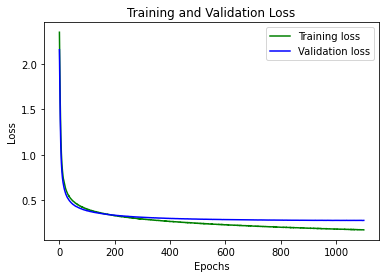

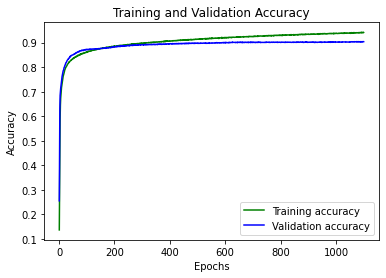

In [28]:
# adding dropout after first hidden layer + Add learning schedule with lr=1e-2
plot_train_loss()
plot_train_accuracy()

### Task 1.2 Train a ConvNet from scratch

*(weight ~2%)*

Build a ConvNet to replace the densely connected network in Task 1.1. Report the classification accuracy on the test set. Aim to achieve higher accuracy. 



In [48]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

AssertionError: ignored

In [45]:
IMAGE_SIZE = 28
from keras import optimizers

def make_model():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(None, 784, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

  return model

model = make_model()  
model.summary()

ValueError: ignored

In [40]:
model = make_model()  

history = model.fit(
      dataset_train,
      steps_per_epoch=steps_per_epoch,
      epochs=100,
      validation_data=dataset_valid,
      validation_steps=50
      )

model.save('fmnist_conv.h5')

Epoch 1/100


ValueError: ignored


### Task 1.3 Build an input pipeline for data augmentation

*(weight ~4%)*

Build a data preprocessing pipeline to perform data augmentation. (You may use Keras ImageDataGenerator or write your own transformations.)

- Report the new classification accuracy. Make sure that you use the same number of training epochs as in Task 1.2.

- (Optional) Profile your input pipeline to identify the most time-consuming operation. What actions have you taken to address that slow operation? (*Hint: You may use the [TensorFlow Profiler](https://github.com/tensorflow/profiler).*)

### Task 1.4 Fashion-MNIST with transfer learning

*(weight ~6%)*

Use a pretrained model as the convolutional base to improve the classification performance. (Hint: You may use models in Keras Applications or those in the TensorFlow Hub.)

- Try both with fine-tuning and without fine-tuning.
- Report the model performance as before.



### Task 1.5 Performance comparison

*(weight ~4%)*

Record the test accuracy achieved at different training configurations above. Which method achieved the highest accuracy? Why did it work better for this problem?


## Task 2 Fast training of deep networks

*(weight ~16%)*

###### Task 2.1 Train a highly accurate network for CIFAR10

*(weight ~6%, each subquestion worths ~2%)*

In this task, you will train deep neural networks on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). Compared with the datasets that you have worked on so far, CIFAR10 represents a relatively larger multi-class classification problem and presents a great opportunity for you to solve a "harder" problem.



#### Task 2.1.1 Document the hardware used

Before you start, write down your hardware specifications, including 

- the GPU model, the number of GPUs, and the GPU memory
- the CPU model, the number of CPUs, and the CPU clock speed

(Hint: you may find commands like `nvidia-smi`, `lscpu` or `psutil` useful.)

#### Task 2.1.2 Train a "shallow" ConvNet

Build a ConvNet with fewer than 10 layers. Train the network until it converges. You will use this network as a baseline for the later experiments. 

- Plot the training and validation history. 
- Report the testing accuracy. 

#### Task 2.1.3 Train a ResNet

Train a residual neural network (ResNet) on the CIFAR10 training data and report the test accuracy and the training time.

The ResNet is a popular network architecture for image classification. You may find more information about how ResNet works by reading this [paper](https://arxiv.org/abs/1512.03385).


*(You may implement a resnet model or use an existing implementation. In either case, you should not use pretrained network weights.)*

### Task 2.2 Fast training of ResNet

*(weight ~5%)*

In this task, you will experiment with different ways to reduce the time for training your ResNet on CIFAR10. There are different ways to speed up neural network training; below are two ideas. Please select at least one idea to implement. Explain the experiment steps and report the final performance and training time.

#### Option 1. Learning rate schedule

Use a learning rate schedule for the training. Some popular learning rate schedules include 

- the Step Decay learning rate (e.g., see [here](https://github.com/kuangliu/pytorch-cifar))
- [Cyclical learning rates](https://arxiv.org/abs/1506.01186)
- [The exponential learning rate](https://openreview.net/forum?id=rJg8TeSFDH) 

Also Keras provides [some convenient functions](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules) that you can use.


#### Option 2. Look ahead optimiser

Read [this paper](https://arxiv.org/abs/1907.08610) and implement the Lookahead optimiser.

### Task 2.3 Performance comparison

*(weight ~5%)*

Based on the above experiments, which method or which combination of methods result in the best accuracy with the same training time.

## Task 3 Design a novel deep neural network model (Challenge Task for Targeting HD Grades)

*(weight ~11%)*
Here, you have to show your critical idea to design a new neural network model. We will evaluate your results based on the novelty of the model and performance of the model. 

### Task 3.1: The key idea to design a novel deep neural networks for CIFAR10

*(weight ~5%)*

In this task, you will design a novel deep neural networks on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). CIFAR10 represents a relatively larger multi-class classification problem and presents a great opportunity for you to solve a "harder" problem. Different from Task 2, in this task you are required to design a novel neural network and optimize the performance in classification. In your answer, you have to clearly present what the key difference between your model and the classic ones, what the benefits in your design model.

### Task 3.2: The implementation of the novel deep neural networks for CIFAR10

*(weight ~6%)*

In this task, it requires you to write the codes for model implementation and report the performance. In your results, you have to demonstrate the compared performance of your new model and the state-of-the-art models.

---
**END OF ASSIGNMENT TWO**